<a href="https://colab.research.google.com/github/karanpk02/CPGRAMS-News-Detection/blob/main/News_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**News Detection Problem**

##**Motivation**
*******
###**I came to know about this problem from news paper(08/08/2022, The Hindu, Malayala Manorama)**
News given below,
*********
**Till the technological solution is formalised, the DARPG should issue guidelines to all ministries, departments and organisations for regularly examining the grievances emanating from the daily newspapers.** 

The Ministry of Personnel, Public Grievance and Pensions has informed a Parliamentary Standing Committee that the government is working on to develop a “technology solution”, where grievances published in newspapers and on social media platforms can be suo motu registered on the Centralised Public Grievance Redress and Monitoring System (CPGRAMS) for action by the authorities concerned. 
CPGRAMS is an online platform available to the citizens 24x7 to lodge their grievances to the public authorities on any subject related to service delivery. The Department of Administrative Reforms and Public Grievances (DARPG) informed the parliamentary panel that in 2016, all Ministries, organisations and departments were requested to regularly examine the grievances column of newspapers to pick up the cases coming under their purview and take expeditious action to redress them in a time bound manner.

News link: [link text](https://www.thehindu.com/news/national/govt-to-develop-portal-to-suo-motu-register-complaints-published-in-newspapers-social-media/article65746231.ece)




![link text](https://pgportal.gov.in/Images/bannerHome/baner-cpgrams_4.jpg)

##**ABOUT CPGRAMS**
*********
Centralised Public Grievance Redress and Monitoring System (CPGRAMS) is an online platform available to the citizens 24x7 to lodge their grievances to the public authorities on any subject related to service delivery. It is a single portal connected to all the Ministries/Departments of Government of India and States. Every Ministry and States have role-based access to this system. CPGRAMS is also accessible to the citizens through standalone mobile application downloadable through Google Play store and mobile application integrated with UMANG.

The status of the grievance filed in CPGRAMS can be tracked with the unique registration ID provided at the time of registration of the complainant. CPGRAMS also provides appeal facility to the citizens if they are not satisfied with the resolution by the Grievance Officer. After closure of grievance if the complainant is not satisfied with the resolution, he/she can provide feedback. If the rating is ‘Poor’ the option to file an appeal is enabled. The status of the Appeal can also be tracked by the petitioner with the grievance registration number.

##**PROBLEM**
************
Predict the relevant and irrelevant news from online. Provide accurate predicted grievances to Government CPGRAMS system.

##**COLLECTION OF DATA**
************
I COLLECTED THE RELEVANT AND IRRELEVANT NEWS FROM ONLINE.

DIVIDED INTO,


1.   RELEVANT
2.   IRRELAVANT

I am adding below some hints given by the website,



###**Relevant Features**
******
Central Government Ministries, Departments or Organizations under DPG’s purview:	
		
1. Railways
2. Telecom	
3. Urban Development
4. Petroleum and Natural Gas		
5. Civil Aviation 	
6. Shipping
7. Expand Road Transport & Highways		
8. Tourism
9. Public Sector Banks 		
10. Public Sector Insurance Companies		
	National Saving Scheme of Ministry of Finance,
	Employees' Provident Fund Organization

11. Passport Authorities	
13. Other sectors	

Central Government Health Scheme,
Central Board of Secondary Education,
		Kendriya Vidyalaya Sangathan,
		National Institute of Open Schooling,
		Navodaya Vidyalaya Samiti,
		Central Universities,
		Scholarship Schemes of Ministry of HRD,
		Deemed Universities (Central),
		ESI Hospitals and Dispensaries directly controlled by ESI, Corporation under Ministry of Labour,
		Youth Affairs



![link text](https://pgportal.gov.in/Images/bannerHome/baner-cpgrams_2.jpg)

###**IRRELEVANT FEATURES**
*******
1. Subjudice cases or any matter concerning judgment given by any court.
2. Personal and family disputes.
3. RTI matters.
4. Anything that impacts upon territorial integrity of the country orfriendly relations with other countries.
5. Suggestions.

![not relevant](https://pgportal.gov.in/Images/bannerHome/baner-cpgrams_5.jpg)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/karanpk02/CPGRAMS-News-Detection/main/News_relevance.csv')
df.head()
#df.shape


,News,Relevance
0,"Broken pathways, waterlogged pockets and long ...",yes
1,Local train services on the Harbour Line in Mu...,yes
2,@IRCTCofficial we boarded 12016 Shatabdi expre...,yes
3,Indian Railways will carry out the mega block ...,yes
4,Swarnam Karipur Vima tried to bypass customs a...,no


In [ ]:
# Relevance Frquency Count
vc_df = pd.DataFrame(df['Relevance'].value_counts()).reset_index()
vc_df.columns = ['Relevance', 'Count'] 
vc_df['Relevance'] = vc_df['Relevance'].map({1 : 'yes', 0: 'no'}) 
vc_df

,Relevance,Count
0,NaN,221
1,NaN,170


In [ ]:
df['News']

0      Broken pathways, waterlogged pockets and long ...
1      Local train services on the Harbour Line in Mu...
2      @IRCTCofficial we boarded 12016 Shatabdi expre...
3      Indian Railways will carry out the mega block ...
4      Swarnam Karipur Vima tried to bypass customs a...
                             ...                        
386    Recent events confirm the general perception t...
387    Tuniram Madri received a goat as a prize in th...
388    In the din over the armed forces’ Agnipath rec...
389    A report today says that Apple is ahead of mos...
390    According to PIL of Dilip Baral, the case is u...
Name: News, Length: 391, dtype: object

#### Replacing punctuations with space

In [ ]:
# Replacing punctuations with space
df['News_processed'] = df['News'].str.replace("[^a-zA-Z0-9]", " ")

# Re ordering columns
df = df[['News','News_processed','Relevance']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
df['News_processed']

0      Broken pathways  waterlogged pockets and long ...
1      Local train services on the Harbour Line in Mu...
2       IRCTCofficial we boarded 12016 Shatabdi expre...
3      Indian Railways will carry out the mega block ...
4      Swarnam Karipur Vima tried to bypass customs a...
                             ...                        
386    Recent events confirm the general perception t...
387    Tuniram Madri received a goat as a prize in th...
388    In the din over the armed forces  Agnipath rec...
389    A report today says that Apple is ahead of mos...
390    According to PIL of Dilip Baral  the case is u...
Name: News_processed, Length: 391, dtype: object

#### Replacing short words

In [ ]:
df['News_processed'] = df['News_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [ ]:
df['News_processed']

0      Broken pathways waterlogged pockets and long t...
1      Local train services the Harbour Line Mumbai w...
2      IRCTCofficial boarded 12016 Shatabdi express f...
3      Indian Railways will carry out the mega block ...
4      Swarnam Karipur Vima tried bypass customs and ...
                             ...                        
386    Recent events confirm the general perception t...
387    Tuniram Madri received goat prize the competit...
388    the din over the armed forces Agnipath recruit...
389    report today says that Apple ahead most large ...
390    According PIL Dilip Baral the case under subju...
Name: News_processed, Length: 391, dtype: object

#### Converting to LowerCase character

In [ ]:
# make entire text lowercase
df['News_processed'] = [review.lower() for review in df['News_processed']]

In [ ]:
df['News_processed']

0      broken pathways waterlogged pockets and long t...
1      local train services the harbour line mumbai w...
2      irctcofficial boarded 12016 shatabdi express f...
3      indian railways will carry out the mega block ...
4      swarnam karipur vima tried bypass customs and ...
                             ...                        
386    recent events confirm the general perception t...
387    tuniram madri received goat prize the competit...
388    the din over the armed forces agnipath recruit...
389    report today says that apple ahead most large ...
390    according pil dilip baral the case under subju...
Name: News_processed, Length: 391, dtype: object

#### Remove stop words

In [ ]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['say','government','news','mla','one', 'even','like','see', 'get', 'bjp', 'congress', 'party', 'nation', 'state',\
             'india', 'country', 'women', 'year', 'indian', 'people', 'makes', 'world', 'take',\
             'time', 'two', 'come', 'also', 'report', 'day', 'minister', 'make', 'delhi', 'increase', \
             'number','issue']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['News_processed'] = [remove_stopwords(r) for r in df['News_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['News_processed'] 

0      broken pathways waterlogged pockets long traff...
1      local train services harbour line mumbai disru...
2      irctcofficial boarded 12016 shatabdi express g...
3      railways carry mega block mumbai sunday july d...
4      swarnam karipur vima tried bypass customs ille...
                             ...                        
386    recent events confirm general perception banki...
387    tuniram madri received goat prize competition ...
388    din armed forces agnipath recruitment scheme w...
389    today says apple ahead large companies tacklin...
390    according pil dilip baral case subjudice hasti...
Name: News_processed, Length: 391, dtype: object

#### Lemmatization

In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    #In the tuple (x[0], nltk_tag_to_wordnet_tag(x[1])) it will fix the first element and change the second element as the shallow pos.
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['News_processed'] = df['News_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df['News_processed']

0      broken pathway waterlogged pocket long traffic...
1      local train service harbour line mumbai disrup...
2      irctcofficial board 12016 shatabdi express gan...
3      railway carry mega block mumbai sunday july du...
4      swarnam karipur vima tried bypass custom illeg...
                             ...                        
386    recent event confirm general perception bankin...
387    tuniram madri receive goat prize competition i...
388    din arm force agnipath recruitment scheme wort...
389    today say apple ahead large company tackle for...
390    accord pil dilip baral case subjudice hastily ...
Name: News_processed, Length: 391, dtype: object

#### Plotting Freqent Words

In [ ]:
df

,News,News_processed,Relevance
0,"Broken pathways, waterlogged pockets and long ...",broken pathway waterlogged pocket long traffic...,yes
1,Local train services on the Harbour Line in Mu...,local train service harbour line mumbai disrup...,yes
2,@IRCTCofficial we boarded 12016 Shatabdi expre...,irctcofficial board 12016 shatabdi express gan...,yes
3,Indian Railways will carry out the mega block ...,railway carry mega block mumbai sunday july du...,yes
4,Swarnam Karipur Vima tried to bypass customs a...,swarnam karipur vima tried bypass custom illeg...,no
...,...,...,...
386,Recent events confirm the general perception t...,recent event confirm general perception bankin...,yes
387,Tuniram Madri received a goat as a prize in th...,tuniram madri receive goat prize competition i...,no
388,In the din over the armed forces’ Agnipath rec...,din arm force agnipath recruitment scheme wort...,yes
389,A report today says that Apple is ahead of mos...,today say apple ahead large company tackle for...,no


**Plot for relevant news words**
*****

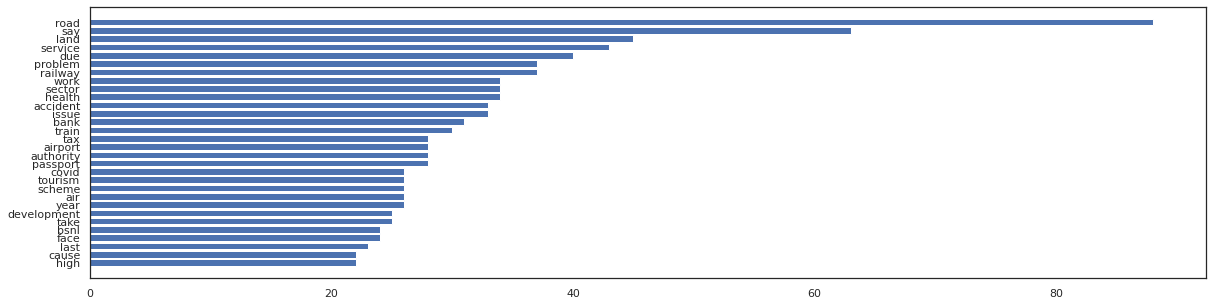

In [ ]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['Relevance'] == 'yes',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['News_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

**Plot for irrelevant news words**
*****

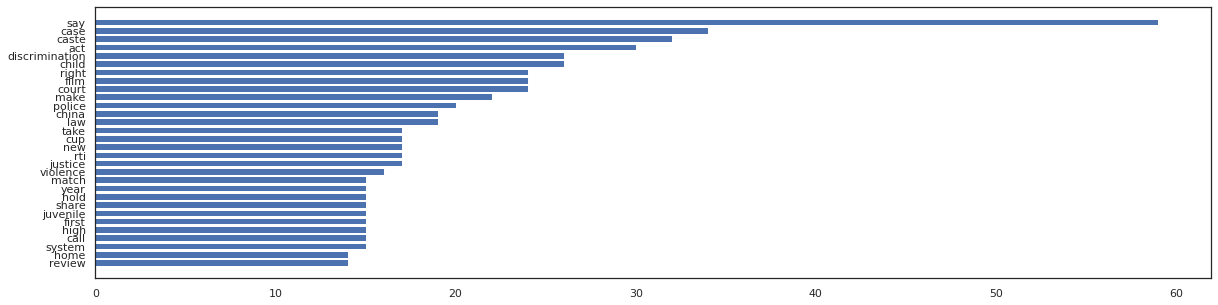

In [ ]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['Relevance'] == 'no',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['News_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

#### **Word Cloud Visual Diagram**
*****
Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called Tag Cloud or WordCloud. For this tutorial, you will learn how to create a WordCloud of your own in Python and customize it as you see fit. This tool will be quite handy for exploring text data and making your report more lively.



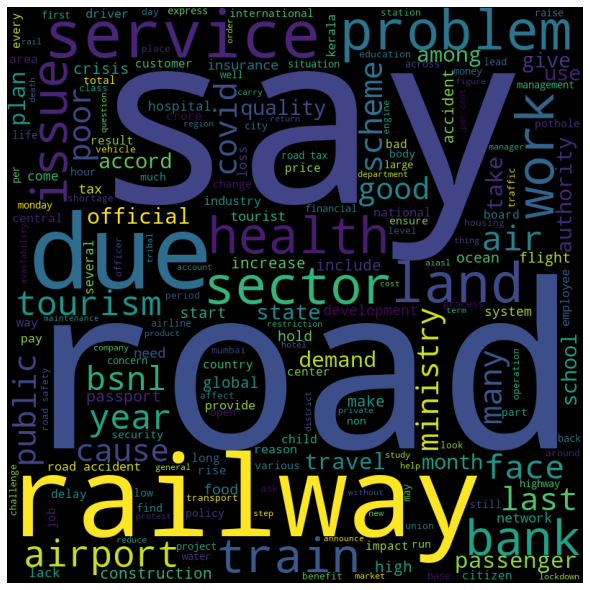

In [ ]:
##
## Bilding a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df.loc[df['Relevance'] == 'yes',:]
all_words = ' '.join([text for text in word_cloud_df['News_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

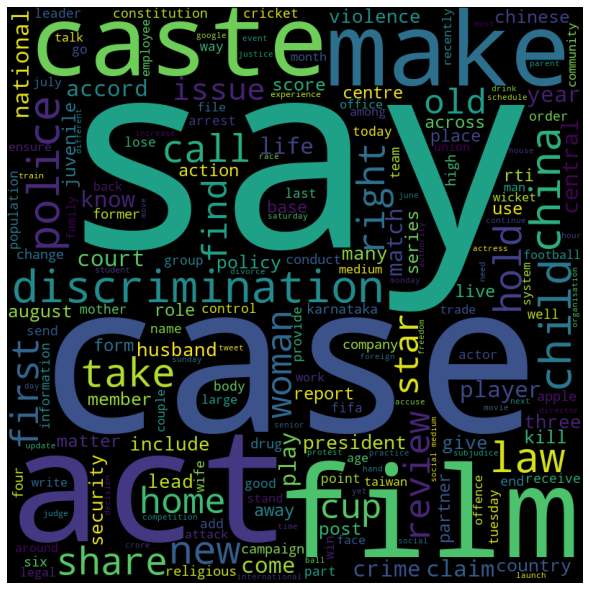

In [ ]:
##
## Bilding a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df.loc[df['Relevance'] == 'no',:]
all_words = ' '.join([text for text in word_cloud_df['News_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Bag of Words Model

In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
tmp_df = tfidf.fit_transform(df.News_processed)
feature_names = tfidf.get_feature_names()
pd.DataFrame(tmp_df.toarray(), columns = feature_names).head() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,002,034,092,100,102,103,10th,113,119,...,york,young,youth,youtube,yudu,zealand,zimbabwe,zodiac,zonal,zone
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.152653,0.0,0.0,0.0,0.0,0.0,0.0,0.152653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(df.News_processed).toarray()
y = df.Relevance.map({'yes' : 1, 'no' : 0}).values
featureNames = tfidf.get_feature_names()
X, y
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.shape, X_test.shape

((312, 2500), (79, 2500))

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Building the ML model

## Feature Importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
y_pred
#featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)},columns = ['Word','Importance'])



array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[28  6]
 [ 9 36]]
The model accuracy is 0.810126582278481


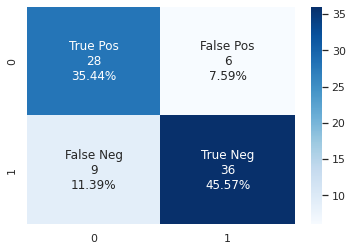

In [ ]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.8117647058823529

In [ ]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
27,0.085247,road
29,0.059832,sector
30,0.050710,service
23,0.049657,problem
21,0.040441,passport
28,0.037553,scheme
17,0.036593,land
36,0.035337,work
4,0.034719,board
31,0.034419,shortage
